# Table of Contents
#### 01. Importing
#### 02. Data Cleaning
#### 03. Exploring Relationships
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots
#### 04. Revist Questions
#### 05. Hypothesis
#### 06. Export Data

## 01. Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Path
path =r'/Users/heathervisentin/Desktop/Data Analysis/Achievement 6/World Happiness Report'

In [3]:
# Importing Data
df = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'WHR original.xlsx'), index_col = False)

## 02 Data Cleaning

#### Renaming Columns

In [4]:
df.columns

Index(['Country name', 'year', 'Happiness Score (life ladder)',
       'GDP per capita (log)', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [5]:
df.shape

(2199, 11)

In [6]:
# Rename columns

df.rename(columns = {'Happiness Score (life ladder)' : 'Happiness Score', 'GDP per capita (log)': 'GDP per capita', 
                     'Healthy life expectancy at birth': 'Life Expectancy', 'Freedom to make life choices': 'Freedom',
                     'Perceptions of corruption': 'Corruption'}, inplace = True)

In [7]:
df.columns

Index(['Country name', 'year', 'Happiness Score', 'GDP per capita',
       'Social support', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [8]:
df.dtypes

Country name        object
year                 int64
Happiness Score    float64
GDP per capita     float64
Social support     float64
Life Expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
Positive affect    float64
Negative affect    float64
dtype: object

In [9]:
df.head()

,Country name,year,Happiness Score,GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


#### Checking Missing Values

In [10]:
# Check for missing values

df.isnull().sum()

Country name         0
year                 0
Happiness Score      0
GDP per capita      20
Social support      13
Life Expectancy     54
Freedom             33
Generosity          69
Corruption         115
Positive affect     24
Negative affect     16
dtype: int64

Other than corruption all missing values account for less than 5%<br>
Corruption accounts for 5.3%, I think having the data for other<br>
columns is worth having the voids in this column, especially because<br>
I don't yet know how important it will be.  But I will need to keep in mind<br>
that it might impact results.

#### Finding Duplicates

In [11]:
# Find duplicates

df_dups = df[df.duplicated()]

In [12]:
df_dups.shape

(0, 11)

no duplicates found

## Exploring Relationships

In [13]:
df.columns

Index(['Country name', 'year', 'Happiness Score', 'GDP per capita',
       'Social support', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

### Correlations

In [14]:
# Rename columns

df.rename(columns = {'Country name' : 'Country'}, inplace = True)

In [15]:
# Create a subset excluding Happiness Rank, Year and Dystopia Residual

sub = df[['Country', 'Happiness Score', 'GDP per capita', 'Social support','Life Expectancy', 'Freedom','Corruption', 'Generosity']]

In [16]:
sub

,Country,Happiness Score,GDP per capita,Social support,Life Expectancy,Freedom,Corruption,Generosity
0,Afghanistan,3.723590,7.350416,0.450662,50.500000,0.718114,0.881686,0.167652
1,Afghanistan,4.401778,7.508646,0.552308,50.799999,0.678896,0.850035,0.190809
2,Afghanistan,4.758381,7.613900,0.539075,51.099998,0.600127,0.706766,0.121316
3,Afghanistan,3.831719,7.581259,0.521104,51.400002,0.495901,0.731109,0.163571
4,Afghanistan,3.782938,7.660506,0.520637,51.700001,0.530935,0.775620,0.237588
...,...,...,...,...,...,...,...,...
2194,Zimbabwe,3.735400,7.734831,0.768425,51.674999,0.732971,0.723612,-0.078541
2195,Zimbabwe,3.638300,7.754387,0.754147,52.150002,0.752826,0.751208,-0.080725
2196,Zimbabwe,3.616480,7.783066,0.775388,52.625000,0.762675,0.844209,-0.051219
2197,Zimbabwe,2.693523,7.697755,0.759162,53.099998,0.631908,0.830652,-0.047464


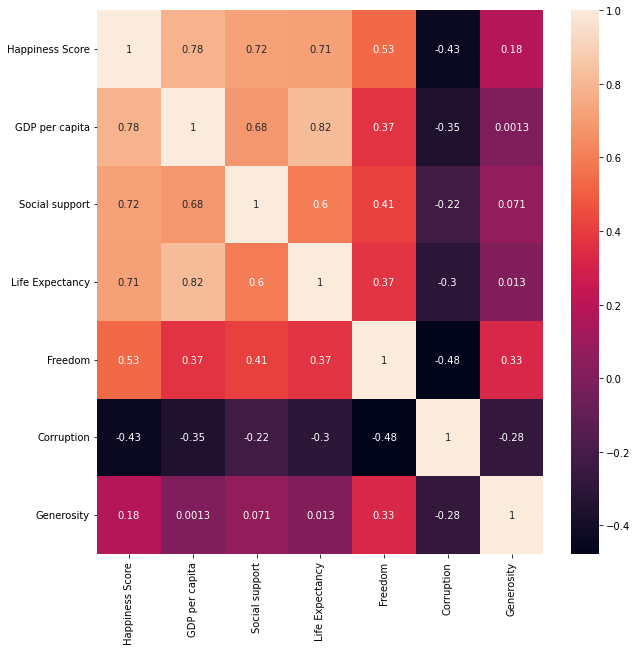

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

We are mainly interested in how things correlate with Happiness Score<br>
GDP per capital, Social support and life expectancy all have a high<br>
correlation with happiness score. Freedom also has a higher correlation<br>
but not as high as the others.  Corruption has a lower negative correlation<br>
and Generosity has almost no correlation.  

It is also worth noting that the highest correlation is between GDP and<br>
life expectancy.  

### Scatterplots

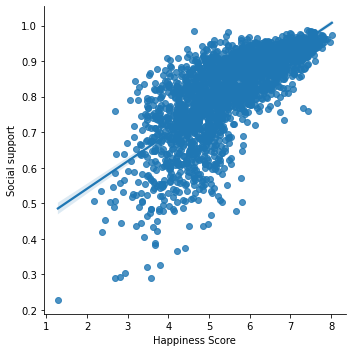

In [18]:
# Create a scatterplot for the Happiness Score and Social Support columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Social support', data = df)

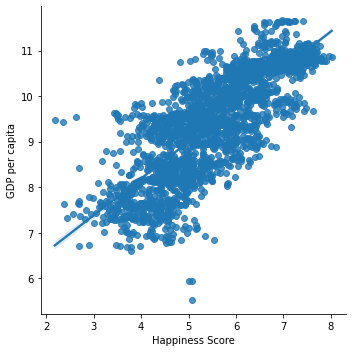

In [19]:
# Create a scatterplot for the Happiness Score and GDP columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'GDP per capita', data = df)

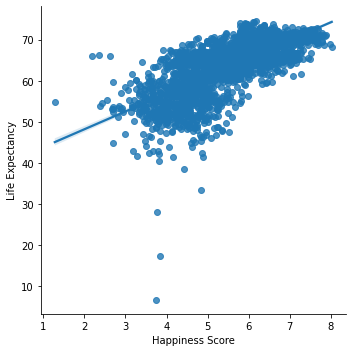

In [20]:
# Create a scatterplot for the Happiness Score and Life expectancy columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Life Expectancy', data = df)

All three have an positive (upward) correlation with happiness score.<br>
They all look fairly similar, which is to be expected as their correlation<br>
numbers were all fairly similar.  You can see that GDP has a slightly<br>
higher slope than the other two.  They all have a wide range of points surrounding<br>
the trend line with a few outliers.


### Pair Plots

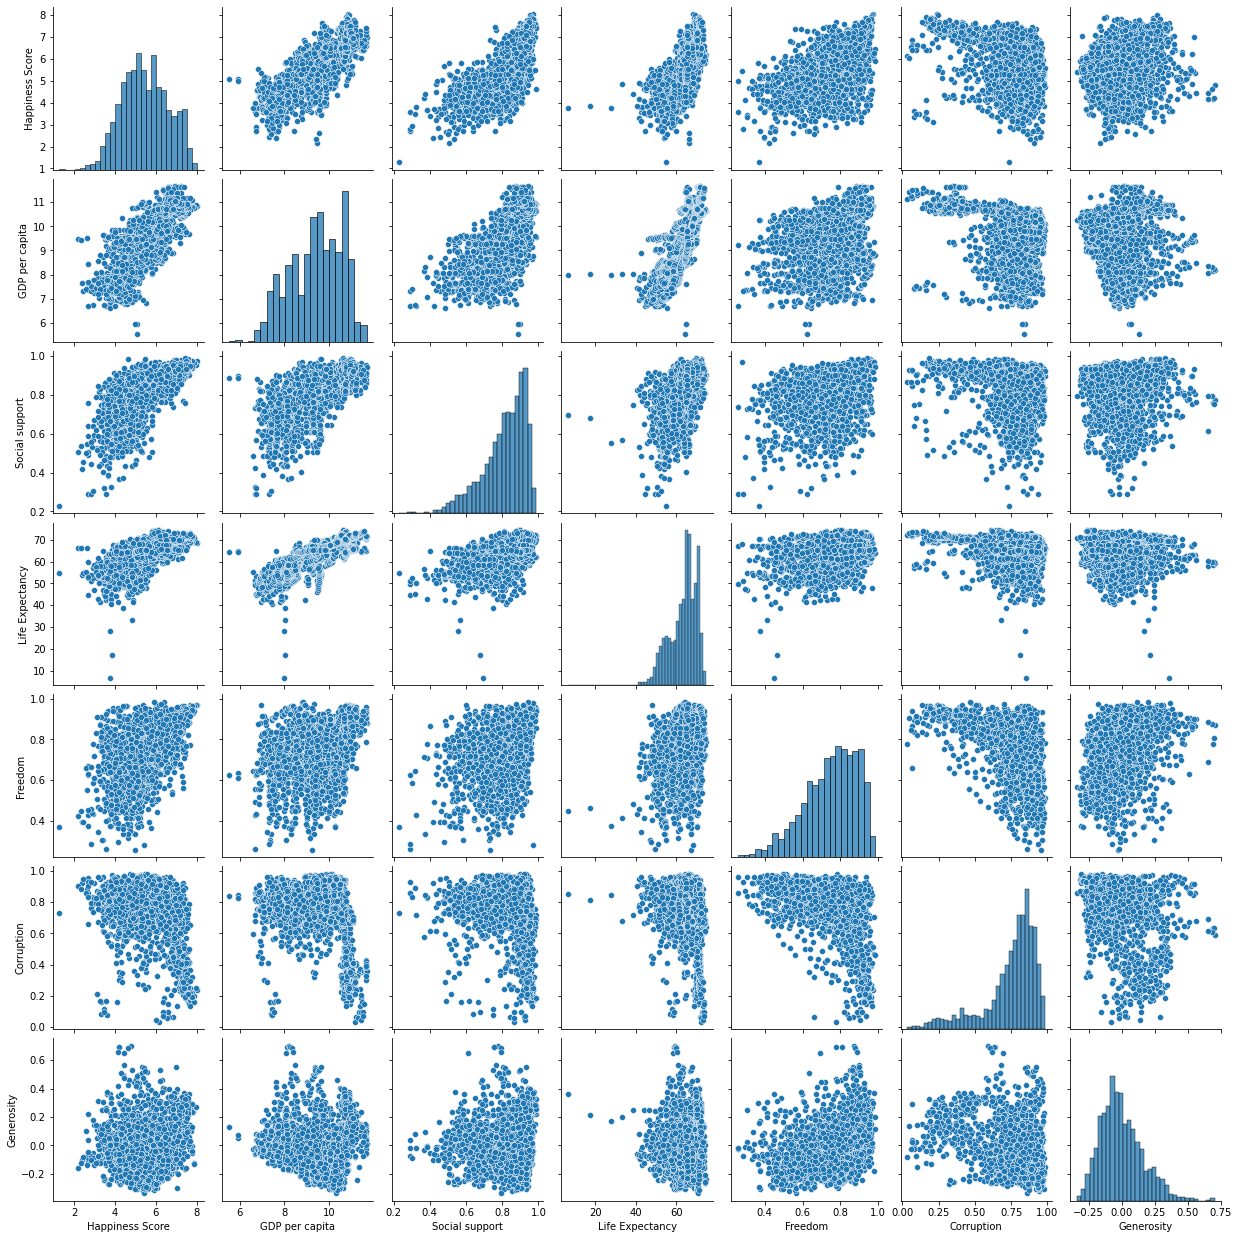

In [21]:
# Create a pair plot 

g = sns.pairplot(sub)

I am mainly concerned with looking into happiness score, with GDP, life expectancy and social support as those seem to be the ones with the largest correlation.  

### Categorical Plots

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

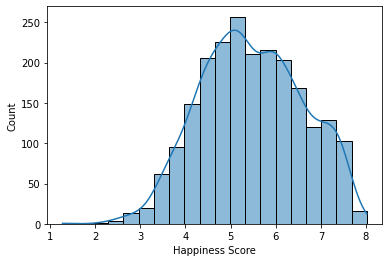

In [22]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['Happiness Score'], bins = 20, kde = True)

In [23]:
df.loc[df['Happiness Score'] < 3.5, 'Happiness category'] = 'Low Happiness'

In [24]:
df.loc[(df['Happiness Score'] >= 3.5) & (df['Happiness Score'] < 6.5), 'Happiness category'] = 'Middle Happiness'

In [25]:
df.loc[df['Happiness Score'] >= 6.5, 'Happiness category'] = 'High Happiness'

In [26]:
df['Happiness category'].value_counts(dropna = False)

Middle Happiness    1679
High Happiness       449
Low Happiness         71
Name: Happiness category, dtype: int64

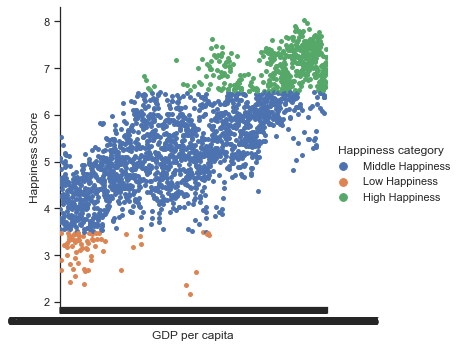

In [29]:
# Create a categorical plot in seaborn using the happiness categories created above

sns.set(style="ticks")
g = sns.catplot(x="GDP per capita", y="Happiness Score", hue="Happiness category", data=df)

Here we can see that there are some outliers who have<br>
low happiness but higher GDP per capita.  There are also<br>
some countries with higher GDP but middle happiness.

In [ ]:
# fig = g.get_figure()
g.savefig("out.png") 

## 04. Revist Questions

Factors related to high or low happiness scores: We know that GDP, Social Support and Life expectancy<br>
all have positive correlation with happiness.  So if a country has low GDP per capital we would expect<br>
to see a low happiness score as well.  Because life expectancy and GDP also have a high correlation it<br>
is hard to say know if one of these is related to Happiness.  Logically I would assume that high GDP<br>
would result in high life expectancy and that the causation might be with GDP more than life expectancy.<br>
Hopefully through more analysis we can answer this better.<br>

This analysis didn't have us specifically looking at years or countries which were most the previous<br>
questions.  

## 05. Hypothesis

Because most of my questions have to do this country and time which we havent really tested yet<br>
it is hard to pinpoint a good hypothesis.  Based on todays analysis I could test<br>

"If a country has a high GDP per capital, then it will have a high happiness score"

## 06. Export Data

In [28]:
#export data
df.to_excel(os.path.join(path, '02 Data','Prepared Data', 'WHR-happiness groups.xlsx'))